In [1]:
# Dataset 1 : Wines

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import MinMaxScaler
# model 
from sklearn.mixture import GaussianMixture
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

#dataset
a = io.open('wine_quality_grp.csv', encoding='latin-1')
df = pd.read_csv(a)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['type'])

#output
y = df['type']

time for running the algorithm = 440.18191999 s


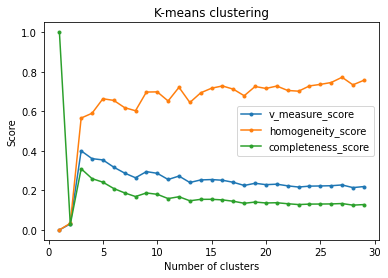

In [2]:
# score of the clustering

from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import completeness_score

# define our scaler
scaler = MinMaxScaler()
# scale down our data
df_scaled = scaler.fit_transform(df)

X_scaled = scaler.fit_transform(X)

v_measure_score_list = []
homogeneity_score_list = []
completeness_score_list = []

time1 = time.perf_counter()

for i in range(1,30):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000,random_state = 32).fit(X_scaled)
    y_pred1 = gm.predict(X_scaled)

    v_measure_score_list.append(v_measure_score(y,y_pred1,beta =1.0))
    homogeneity_score_list.append(homogeneity_score(y,y_pred1))
    completeness_score_list.append(completeness_score(y,y_pred1))
    
time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')

number_of_clusters = [i for i in range(1,30)]
fig, ax = plt.subplots()
ax.set_title('K-means clustering')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Score')
ax.plot(number_of_clusters, v_measure_score_list, marker=".", label="v_measure_score")
ax.plot(number_of_clusters, homogeneity_score_list, marker=".", label="homogeneity_score")
ax.plot(number_of_clusters, completeness_score_list, marker=".", label="completeness_score")
ax.legend()
plt.show()